# Honeycomb Lattice Generator with Boundary Conditions

## Overview

This Python code generates a honeycomb (hexagonal) lattice with customizable coloring patterns and specific boundary conditions. The lattice consists of hexagons arranged in a honeycomb pattern, where each hexagon can be colored either gray or white based on probabilistic rules for interior hexagons and deterministic rules for boundary hexagons.

## Key Features

### 1. **Hexagonal Grid Generation**
- Creates an M×N grid of regular hexagons in a honeycomb pattern
- Proper geometric spacing with alternating row offsets
- Hexagons are positioned with flat tops (standard orientation)

### 2. **Two-Color System**
- **Gray hexagons**: Colored with a specified probability
- **White hexagons**: Complement of gray hexagons
- Clean visualization using matplotlib

### 3. **Boundary Conditions**
The code implements specific boundary conditions that create a "funnel effect":

#### Boundary Rules:
- **Left boundary** (column 0): All hexagons are **GRAY**
- **Right boundary** (column N-1): All hexagons are **WHITE**
- **Bottom boundary** (row 0):
  - **GRAY** if x < 0 (left half)
  - **WHITE** if x ≥ 0 (right half)
- **Top boundary** (row M-1):
  - **GRAY** if x < x_split
  - **WHITE** if x ≥ x_split
  - Where `x_split = ((M-1) % 2) × (√3/2)`

These boundary conditions are designed to guide a hypothetical walker from the bottom-middle to the top-middle of the grid, creating a natural flow pattern.

### 4. **Interior Coloring**
- Interior hexagons (non-boundary) are randomly colored
- Probability `p` determines the likelihood of a hexagon being gray
- Each interior hexagon is independently colored

## Class Structure

### `HoneycombLattice`

Main class that handles lattice generation and visualization.

#### Constructor Parameters:
- `M` (int): Number of hexagon rows
- `N` (int): Number of hexagon columns (should be even for proper tiling)
- `p` (float): Probability of gray color for interior hexagons (0 ≤ p ≤ 1)
- `apply_boundary_conditions` (bool): Whether to apply special boundary coloring (default: True)
- `seed` (int, optional): Random seed for reproducibility

#### Key Methods:

##### `visualize()`
Creates a matplotlib visualization of the lattice.
- Parameters:
  - `figsize`: Figure dimensions (default: (12, 10))
  - `show_grid`: Display coordinate grid (default: False)
  - `edge_color`: Color of hexagon edges (default: 'black')
  - `edge_width`: Width of hexagon edges (default: 1.0)
- Returns: matplotlib figure and axis objects

##### `get_statistics()`
Returns a dictionary with lattice statistics:
- Total hexagon counts
- Gray/white distributions
- Boundary vs interior breakdowns
- Percentages

##### `describe_boundary_conditions()`
Prints a human-readable description of the boundary conditions.

##### `get_hexagon_colors()` / `get_color_matrix()`
Returns the lattice colors as an M×N numpy array.
- **Matrix structure**:
  - First row (index 0) contains colors of the **bottom row** of hexagons
  - Last row (index M-1) contains colors of the **top row** of hexagons
  - 1 = gray hexagon, 0 = white hexagon
- Both method names can be used interchangeably

## Usage Examples

### Basic Usage
```python
# Create a 20×20 lattice with 50% gray probability
lattice = HoneycombLattice(M=20, N=20, p=0.5)

# Visualize the lattice
fig, ax = lattice.visualize()
plt.show()

# Get statistics
stats = lattice.get_statistics()
print(f"Gray hexagons: {stats['gray_hexagons']}")
```

### Using the Quick Function
```python
# Quick creation with boundary conditions
lattice = create_lattice_with_bc(M=30, N=30, p=0.6, seed=42)
fig, ax = lattice.visualize(figsize=(14, 12))
```

### Without Boundary Conditions
```python
# Create lattice with pure random coloring
lattice = HoneycombLattice(M=20, N=20, p=0.7, 
                          apply_boundary_conditions=False)
```

### Accessing Color Matrix
```python
# Get the color matrix for further processing
colors = lattice.get_color_matrix()  # or lattice.get_hexagon_colors()
print(f"Shape: {colors.shape}")  # (M, N)
print(f"Gray count: {np.sum(colors)}")

# Access specific rows
bottom_row = colors[0]     # Bottom row of lattice
top_row = colors[-1]        # Top row of lattice

# Check boundary conditions in matrix
left_column = colors[:, 0]   # Should all be 1 (gray)
right_column = colors[:, -1]  # Should all be 0 (white)
```

### Verifying Boundary Conditions
```python
# Create lattice and get color matrix
lattice = create_lattice_with_bc(M=10, N=12, p=0.5, seed=100)
colors = lattice.get_color_matrix()

# Verify all boundary conditions
assert all(colors[:, 0] == 1), "Left boundary should be all gray"
assert all(colors[:, -1] == 0), "Right boundary should be all white"

# Check bottom row split (gray on left, white on right)
bottom_mid = len(colors[0]) // 2
assert colors[0, 0] == 1, "Bottom-left should be gray"
assert colors[0, -1] == 0, "Bottom-right should be white"

print("All boundary conditions verified!")
```

### Exporting Matrix Data
```python
# Create lattice and export to file
lattice = create_lattice_with_bc(M=50, N=50, p=0.7, seed=42)
colors = lattice.get_color_matrix()

# Save as numpy array
np.save('lattice_colors.npy', colors)

# Save as CSV
np.savetxt('lattice_colors.csv', colors, delimiter=',', fmt='%d')

# Load back later
loaded_colors = np.load('lattice_colors.npy')
```

## Physical Interpretation

This lattice generator can model various physical and mathematical systems:

1. **Random Walk Environments**: The boundary conditions create a natural pathway for particles or walkers moving through the lattice

2. **Percolation Studies**: The random interior coloring can represent porous media or conductive/insulating regions

3. **Optical Systems**: Gray/white hexagons can represent different refractive indices or absorption coefficients

4. **Game Theory**: The lattice can represent spatial games where colors indicate different strategies or states

5. **Material Science**: Modeling crystalline structures with defects or mixed compositions

## Implementation Details

### Color Matrix Representation
The lattice can be represented as an M×N matrix where:
- **Row indexing**: 
  - Row 0 corresponds to the **bottom** row of the physical lattice
  - Row M-1 corresponds to the **top** row of the physical lattice
  - Rows increase from bottom to top
- **Column indexing**: 
  - Column 0 corresponds to the **leftmost** column
  - Column N-1 corresponds to the **rightmost** column
- **Values**: 
  - 1 indicates a gray hexagon
  - 0 indicates a white hexagon

This matrix representation makes it easy to:
- Verify boundary conditions programmatically
- Export lattice data for external processing
- Interface with other numerical algorithms

### Coordinate System
- Origin at bottom-left of the grid
- X-axis: horizontal (increases rightward)
- Y-axis: vertical (increases upward)
- Hexagon centers calculated with proper honeycomb geometry

### Hexagon Geometry
- Radius: 1.0 unit (center to vertex distance)
- Width: √3 units
- Height: 2.0 units
- Flat-top orientation (30° rotation)

### Random Number Generation
- Configurable seed for reproducible results
- Independent random coloring for each interior hexagon
- Boundary hexagons follow deterministic rules

## Dependencies

- `numpy`: For numerical operations and array handling
- `matplotlib`: For visualization
- `random`: For random number generation
- Python 3.6+ (for type hints and f-strings)

## Notes

- The number of columns (N) should be even for optimal honeycomb tiling
- Boundary conditions are designed to work with the companion random walk code
- All hexagons appear visually uniform (no special boundary highlighting)
- The code uses clean, modular design for easy extension and modification
- **Matrix indexing convention**: Row 0 is the bottom of the lattice, row M-1 is the top
- The color matrix provides a convenient numerical representation for computational processing

## Example Output

When run with default parameters (M=20, N=20, p=0.5), the code generates:
- A 20×20 honeycomb grid
- Approximately 50% gray interior hexagons
- Fixed boundary colors creating the funnel pattern
- Clean matplotlib visualization with proper aspect ratio
- An M×N color matrix where:
  - `matrix[0]` contains the bottom row colors
  - `matrix[19]` contains the top row colors
  - All values in `matrix[:, 0]` are 1 (left boundary gray)
  - All values in `matrix[:, 19]` are 0 (right boundary white)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import random
from typing import Tuple, List, Optional

Honeycomb Lattice with Boundary Conditions
Boundary Conditions:
----------------------------------------
Left boundary (col=0): All GRAY
Right boundary (col=N-1): All WHITE
Bottom boundary (row=0):
  - GRAY if x < 0 (left half)
  - WHITE if x >= 0 (right half)
Top boundary (row=M-1):
  - GRAY if x < 0.000
  - WHITE if x >= 0.000

These conditions create a 'funnel effect' that guides
a walker from bottom-middle to top-middle of the grid.

Detailed Lattice Statistics:
----------------------------------------
Total hexagons: 300
  Gray: 151 (50.3%)
  White: 149 (49.7%)

Boundary hexagons: 66
  Gray: 33
  White: 33

Interior hexagons: 234
  Gray: 118 (50.4%)
  White: 116 (49.6%)

Color Matrix Information:
  Shape: (15, 20) (M×N)
  Matrix[0] = Bottom row of lattice
  Matrix[14] = Top row of lattice


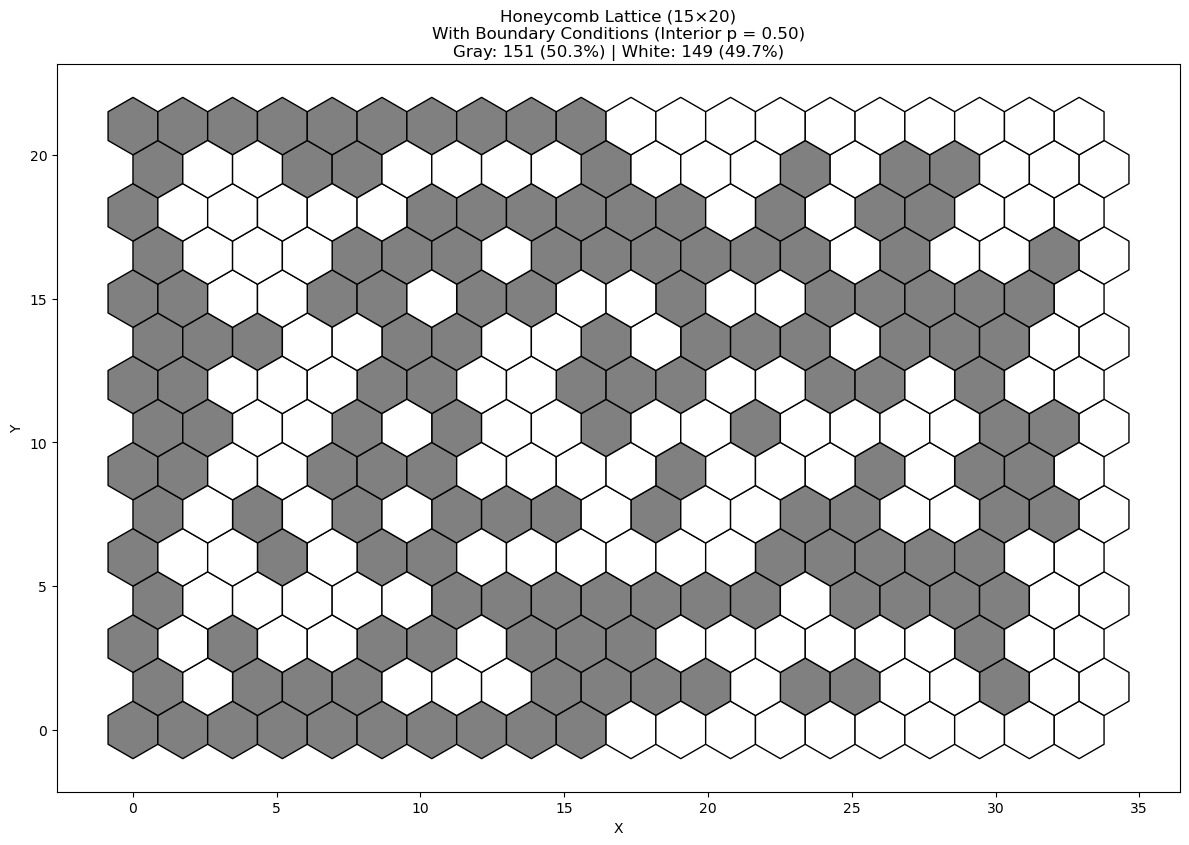


Color Matrix Demonstration

Color matrix shape: (15, 20)
Total gray hexagons: 151
Total white hexagons: 149

Bottom row colors (1=gray, 0=white):
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]

Top row colors (1=gray, 0=white):
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]

Sample of color matrix (bottom-left 5x5 corner):
(Row 0 is bottom of lattice)
Row 0: 1 1 1 1 1
Row 1: 1 0 1 1 1
Row 2: 1 0 1 0 0
Row 3: 1 0 0 0 0
Row 4: 1 0 0 1 0


In [2]:
class HoneycombLattice:
    """
    Generate and visualize a honeycomb (hexagonal) lattice with random coloring
    and specific boundary conditions.
    
    Interior hexagons: colored gray with probability p, white with probability (1-p)
    Boundary hexagons: follow specific rules to create a funnel effect
    """
    
    def __init__(self, M: int, N: int, p: float, 
                 apply_boundary_conditions: bool = True,
                 seed: Optional[int] = None):
        """
        Initialize honeycomb lattice generator.
        
        Args:
            M: Number of rows of hexagons
            N: Number of columns of hexagons (should be even for proper tiling)
            p: Probability of gray color for INTERIOR hexagons (0 <= p <= 1)
            apply_boundary_conditions: Whether to apply special boundary coloring (default: True)
            seed: Random seed for reproducibility
        """
        self.M = M
        self.N = N
        self.p = p
        self.apply_boundary_conditions = apply_boundary_conditions
        
        # Validate inputs
        if not (0 <= p <= 1):
            raise ValueError("Probability p must be between 0 and 1")
        if N % 2 != 0:
            print("Warning: N should be even for proper honeycomb tiling")
        
        # Set random seed if provided
        if seed is not None:
            random.seed(seed)
            np.random.seed(seed)
        
        # Hexagon geometry constants
        self.hex_radius = 1.0  # Distance from center to vertex
        self.hex_width = np.sqrt(3) * self.hex_radius  # Width of hexagon
        self.hex_height = 2 * self.hex_radius  # Height of hexagon
        
        # Calculate boundary split points
        self.x_top_split = ((M - 1) % 2) * (np.sqrt(3) / 2)
        
        # Generate the lattice
        self.hexagons = []  # List of (center_x, center_y, is_gray, is_boundary)
        self._generate_lattice()
    
    def _is_boundary_hexagon(self, row: int, col: int) -> bool:
        """Check if a hexagon at given row, col is on the boundary."""
        return (row == 0 or row == self.M - 1 or 
                col == 0 or col == self.N - 1)
    
    def _get_boundary_color(self, row: int, col: int, center_x: float) -> bool:
        """
        Get the color for a boundary hexagon based on boundary conditions.
        
        Returns:
            True for gray, False for white
        """
        # Left boundary: all gray
        if col == 0:
            return True
        
        # Right boundary: all white
        if col == self.N - 1:
            return False
        
        # Bottom boundary: gray if x < 0, white if x >= 0
        if row == 0:
            # Need to center the x-coordinate relative to the middle of the grid
            x_relative = center_x - (self.N - 1) * self.hex_width / 2
            return x_relative < 0
        
        # Top boundary: gray if x < x_split, white if x >= x_split
        if row == self.M - 1:
            x_relative = center_x - (self.N - 1) * self.hex_width / 2
            return x_relative < self.x_top_split
        
        # Should not reach here for boundary hexagons
        return False
    
    def _generate_lattice(self):
        """Generate the hexagon positions and colors."""
        # Spacing between hexagon centers
        dx = self.hex_width  # Horizontal spacing
        dy = 3/2 * self.hex_radius  # Vertical spacing
        
        for row in range(self.M):
            for col in range(self.N):
                # Calculate hexagon center position
                # Offset every other row for honeycomb pattern
                if row % 2 == 0:
                    center_x = col * dx
                else:
                    center_x = col * dx + dx/2
                
                center_y = row * dy
                
                # Check if this is a boundary hexagon
                is_boundary = self._is_boundary_hexagon(row, col)
                
                # Determine color based on position
                if is_boundary and self.apply_boundary_conditions:
                    # Apply boundary conditions
                    is_gray = self._get_boundary_color(row, col, center_x)
                else:
                    # Interior hexagon or no BC: randomly assign color
                    is_gray = random.random() < self.p
                
                self.hexagons.append((center_x, center_y, is_gray, is_boundary))
    
    def _create_hexagon(self, center_x: float, center_y: float) -> np.ndarray:
        """
        Create vertices for a regular hexagon.
        
        Args:
            center_x: X coordinate of hexagon center
            center_y: Y coordinate of hexagon center
            
        Returns:
            Array of (x, y) vertices
        """
        angles = np.linspace(0, 2*np.pi, 7)  # 6 vertices + closing point
        # Start from flat top (rotate by 30 degrees)
        angles = angles + np.pi/6
        
        vertices = []
        for angle in angles[:-1]:  # Exclude the closing point
            x = center_x + self.hex_radius * np.cos(angle)
            y = center_y + self.hex_radius * np.sin(angle)
            vertices.append([x, y])
        
        return np.array(vertices)
    
    def visualize(self, figsize: Tuple[float, float] = (12, 10), 
                  show_grid: bool = False, 
                  edge_color: str = 'black',
                  edge_width: float = 1.0):
        """
        Visualize the honeycomb lattice.
        
        Args:
            figsize: Figure size (width, height)
            show_grid: Whether to show coordinate grid
            edge_color: Color of hexagon edges
            edge_width: Width of hexagon edges
        """
        fig, ax = plt.subplots(figsize=figsize)
        
        # Create hexagon patches - all hexagons treated the same visually
        gray_patches = []
        white_patches = []
        
        for center_x, center_y, is_gray, is_boundary in self.hexagons:
            vertices = self._create_hexagon(center_x, center_y)
            hexagon = patches.Polygon(vertices, closed=True)
            
            if is_gray:
                gray_patches.append(hexagon)
            else:
                white_patches.append(hexagon)
        
        # Create patch collections with uniform appearance
        gray_collection = PatchCollection(gray_patches, 
                                         facecolor='gray', 
                                         edgecolor=edge_color, 
                                         linewidth=edge_width)
        white_collection = PatchCollection(white_patches, 
                                          facecolor='white', 
                                          edgecolor=edge_color, 
                                          linewidth=edge_width)
        
        # Add to plot
        ax.add_collection(gray_collection)
        ax.add_collection(white_collection)
        
        # Set axis properties
        ax.set_aspect('equal')
        ax.autoscale_view()
        
        # Add labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        
        title = f'Honeycomb Lattice ({self.M}×{self.N})\n'
        if self.apply_boundary_conditions:
            title += f'With Boundary Conditions (Interior p = {self.p:.2f})\n'
        else:
            title += f'Random Coloring (p = {self.p:.2f})\n'
        
        stats = self.get_statistics()
        title += (f'Gray: {stats["gray_hexagons"]} ({stats["gray_percentage"]:.1f}%) | '
                 f'White: {stats["white_hexagons"]} ({stats["white_percentage"]:.1f}%)')
        
        ax.set_title(title)
        
        if show_grid:
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig, ax
    
    def get_statistics(self) -> dict:
        """Get statistics about the generated lattice."""
        total = len(self.hexagons)
        gray_count = sum(1 for _, _, is_gray, _ in self.hexagons if is_gray)
        white_count = total - gray_count
        
        boundary_count = sum(1 for _, _, _, is_boundary in self.hexagons if is_boundary)
        interior_count = total - boundary_count
        
        interior_gray = sum(1 for _, _, is_gray, is_boundary in self.hexagons 
                           if is_gray and not is_boundary)
        interior_white = interior_count - interior_gray
        
        boundary_gray = gray_count - interior_gray
        boundary_white = white_count - interior_white
        
        return {
            'total_hexagons': total,
            'gray_hexagons': gray_count,
            'white_hexagons': white_count,
            'boundary_hexagons': boundary_count,
            'interior_hexagons': interior_count,
            'interior_gray': interior_gray,
            'interior_white': interior_white,
            'boundary_gray': boundary_gray,
            'boundary_white': boundary_white,
            'gray_percentage': gray_count / total * 100 if total > 0 else 0,
            'white_percentage': white_count / total * 100 if total > 0 else 0
        }
    
    def get_hexagon_colors(self) -> np.ndarray:
        """
        Get the color matrix as a 2D array.
        
        Returns:
            M×N array where:
            - First row (index 0) contains colors of bottom row hexagons
            - Last row (index M-1) contains colors of top row hexagons
            - 1 = gray hexagon, 0 = white hexagon
        """
        colors = np.zeros((self.M, self.N))
        
        # Map each hexagon to its position in the matrix
        # Row 0 in generation corresponds to bottom row (matrix row 0)
        for i, (_, _, is_gray, _) in enumerate(self.hexagons):
            row = i // self.N  # Which row (0 = bottom)
            col = i % self.N   # Which column
            colors[row, col] = 1 if is_gray else 0
        
        return colors
    
    def get_color_matrix(self) -> np.ndarray:
        """
        Alias for get_hexagon_colors() - returns the lattice as a matrix.
        
        Returns:
            M×N numpy array where:
            - colors[0] = bottom row of hexagons
            - colors[M-1] = top row of hexagons
            - 1 = gray, 0 = white
        """
        return self.get_hexagon_colors()
    
    def describe_boundary_conditions(self):
        """Print a description of the boundary conditions."""
        if not self.apply_boundary_conditions:
            print("No boundary conditions applied - all hexagons randomly colored")
            return
            
        print("Boundary Conditions:")
        print("-" * 40)
        print("Left boundary (col=0): All GRAY")
        print("Right boundary (col=N-1): All WHITE")
        print("Bottom boundary (row=0):")
        print("  - GRAY if x < 0 (left half)")
        print("  - WHITE if x >= 0 (right half)")
        print("Top boundary (row=M-1):")
        print(f"  - GRAY if x < {self.x_top_split:.3f}")
        print(f"  - WHITE if x >= {self.x_top_split:.3f}")
        print("\nThese conditions create a 'funnel effect' that guides")
        print("a walker from bottom-middle to top-middle of the grid.")
    
    def print_detailed_statistics(self):
        """Print detailed statistics about the lattice."""
        stats = self.get_statistics()
        
        print("\nDetailed Lattice Statistics:")
        print("-" * 40)
        print(f"Total hexagons: {stats['total_hexagons']}")
        print(f"  Gray: {stats['gray_hexagons']} ({stats['gray_percentage']:.1f}%)")
        print(f"  White: {stats['white_hexagons']} ({stats['white_percentage']:.1f}%)")
        
        if self.apply_boundary_conditions:
            print(f"\nBoundary hexagons: {stats['boundary_hexagons']}")
            print(f"  Gray: {stats['boundary_gray']}")
            print(f"  White: {stats['boundary_white']}")
            print(f"\nInterior hexagons: {stats['interior_hexagons']}")
            print(f"  Gray: {stats['interior_gray']} ({stats['interior_gray']/stats['interior_hexagons']*100:.1f}%)")
            print(f"  White: {stats['interior_white']} ({stats['interior_white']/stats['interior_hexagons']*100:.1f}%)")


def create_lattice_with_bc(M: int = 20, N: int = 20, p: float = 0.5, seed: Optional[int] = None):
    """
    Quick function to create a lattice with boundary conditions.
    
    Args:
        M: Number of rows
        N: Number of columns (should be even)
        p: Probability of gray for interior hexagons
        seed: Random seed
    
    Returns:
        HoneycombLattice object
    """
    lattice = HoneycombLattice(M=M, N=N, p=p, 
                              apply_boundary_conditions=True, 
                              seed=seed)
    return lattice


def demonstrate_color_matrix():
    """Demonstrate the color matrix functionality."""
    
    print("\nColor Matrix Functionality Demo")
    print("=" * 50)
    
    # Create a small lattice for clear demonstration
    M, N = 8, 10
    lattice = create_lattice_with_bc(M=M, N=N, p=0.5, seed=100)
    
    # Get the color matrix
    colors = lattice.get_color_matrix()
    
    print(f"Lattice size: {M} rows × {N} columns")
    print(f"Color matrix shape: {colors.shape}")
    print("\nFull Color Matrix (1=gray, 0=white):")
    print("Bottom row at index 0, Top row at index", M-1)
    print("-" * 40)
    
    # Print the entire matrix with row labels
    for i in range(colors.shape[0]):
        row_label = "Bottom" if i == 0 else "Top" if i == M-1 else f"Row {i}"
        row_str = ' '.join([str(int(x)) for x in colors[i]])
        print(f"{row_label:8}: {row_str}")
    
    # Verify boundary conditions
    print("\nBoundary Verification:")
    print(f"  Left column (all gray): {all(colors[:, 0] == 1)}")
    print(f"  Right column (all white): {all(colors[:, -1] == 0)}")
    
    # Check bottom row split
    bottom_left = colors[0, :N//2]
    bottom_right = colors[0, N//2:]
    print(f"  Bottom row - left half mostly gray: {np.mean(bottom_left):.2f}")
    print(f"  Bottom row - right half mostly white: {1-np.mean(bottom_right):.2f}")
    
    return lattice, colors


def demonstrate_lattice():
    """Demonstrate the honeycomb lattice with boundary conditions."""
    
    print("Honeycomb Lattice with Boundary Conditions")
    print("=" * 50)
    
    # Create lattice with boundary conditions
    M, N = 15, 20
    p = 0.5
    
    lattice = create_lattice_with_bc(M=M, N=N, p=p, seed=42)
    
    # Describe boundary conditions
    lattice.describe_boundary_conditions()
    
    # Print detailed statistics
    lattice.print_detailed_statistics()
    
    # Get and display color matrix info
    color_matrix = lattice.get_color_matrix()
    print(f"\nColor Matrix Information:")
    print(f"  Shape: {color_matrix.shape} (M×N)")
    print(f"  Matrix[0] = Bottom row of lattice")
    print(f"  Matrix[{M-1}] = Top row of lattice")
    
    # Visualize
    fig, ax = lattice.visualize(figsize=(12, 10))
    plt.show()
    
    return lattice


# Main execution
if __name__ == "__main__":
    # Default: Create lattice with boundary conditions
    lattice = demonstrate_lattice()
    
    # Demonstrate color matrix functionality
    print("\n" + "="*50)
    print("Color Matrix Demonstration")
    print("="*50)
    
    # Get the color matrix
    color_matrix = lattice.get_color_matrix()
    print(f"\nColor matrix shape: {color_matrix.shape}")
    print(f"Total gray hexagons: {int(np.sum(color_matrix))}")
    print(f"Total white hexagons: {int(np.size(color_matrix) - np.sum(color_matrix))}")
    
    # Show bottom row (first row of matrix)
    print(f"\nBottom row colors (1=gray, 0=white):")
    print(color_matrix[0].astype(int))
    
    # Show top row (last row of matrix)
    print(f"\nTop row colors (1=gray, 0=white):")
    print(color_matrix[-1].astype(int))
    
    # Show a sample of the matrix (bottom-left corner)
    print(f"\nSample of color matrix (bottom-left 5x5 corner):")
    print("(Row 0 is bottom of lattice)")
    for i in range(min(5, color_matrix.shape[0])):
        row_str = ' '.join([str(int(x)) for x in color_matrix[i][:min(5, color_matrix.shape[1])]])
        print(f"Row {i}: {row_str}")
    
    # You can also create directly:
    # lattice = create_lattice_with_bc(M=30, N=30, p=0.6, seed=123)
    # colors = lattice.get_color_matrix()
    # fig, ax = lattice.visualize()
    # plt.show()